In [1]:
# import libraries

import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#FACIAL_LANDMARKS_IDXS =
#	("mouth", (48, 68)),
#	("right_eyebrow", (17, 22)),
#	("left_eyebrow", (22, 27)),
#	("right_eye", (36, 42)),
#	("left_eye", (42, 48)),
#	("nose", (27, 35)),
#	("jaw", (0, 17))

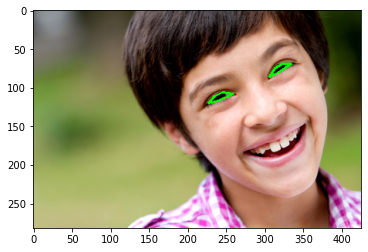

In [73]:
# image

# read the img
image = cv2.imread("../imgs/happyboy.jpg")

# initialize detector and predictor
faces_bboxes = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("../models/dlib_shape_predictor_68_face_landmarks.dat")

# convert img to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find faces
faces = faces_bboxes(gray, 0)

# initialize empty array with shape (68, 2) (the predictor return 68 facemarks x y coordinates)
coords = np.zeros((68, 2), dtype="int") # need to specify the datatype for convexHull to work

# loop over the bounding box
for face in faces:
    # find landmark for every bounding box
    landmarks = landmark_predictor(gray, face)
    # loop over landmarks to update the coordinates array
    for i in range(0, landmarks.num_parts):
        coords[i] = (landmarks.part(i).x, landmarks.part(i).y)

# slice coords to find landmarks of eyes (index in the previous cell)
left_eye = coords[42:48]
right_eye = coords[36:42]

# find convex hull
leye_hull = cv2.convexHull(left_eye)
reye_hull = cv2.convexHull(right_eye)

# draw eye contour
cv2.drawContours(image, [leye_hull], -1, (0, 255, 0), 2)
cv2.drawContours(image, [reye_hull], -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [2]:
# video

# initialize detector and predictor
faces_bboxes = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("../models/dlib_shape_predictor_68_face_landmarks.dat")


# open videocapture from the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # find faces
    faces = faces_bboxes(gray, 0)

    # initialize empty array with shape (68, 2) (the predictor return 68 facemarks x y coordinates)
    coords = np.zeros((68, 2), dtype="int") # need to specify the datatype for convexHull to work

    # loop over the bounding box
    for face in faces:
        # find landmark for every bounding box
        landmarks = landmark_predictor(gray, face)
        # loop over landmarks to update the coordinates array
        for i in range(0, landmarks.num_parts):
            coords[i] = (landmarks.part(i).x, landmarks.part(i).y)

    # slice coords to find landmarks of eyes (index in the previous cell)
    left_eye = coords[42:48]
    right_eye = coords[36:42]

    # find convex hull
    leye_hull = cv2.convexHull(left_eye)
    reye_hull = cv2.convexHull(right_eye)

    # draw eye contour
    cv2.drawContours(frame, [leye_hull], -1, (0, 255, 0), 2)
    cv2.drawContours(frame, [reye_hull], -1, (0, 255, 0), 2)

    cv2.imshow('Webcam Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

